## Life Expectancy Prediction Using Regression

Regression is suitable for this application because 
- we have one dependant variable--> Life Expectancy and remaining independent variables which is multiple linear regression

In [1]:
#importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the life expectancy dataset
data = pd.read_csv("Life_Expectancy_Data.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Data cleaning 

In [3]:
#getting data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
#Checking for null values
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
data['Life expectancy ']

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

In [8]:
data['Life expectancy '].fillna(data['Life expectancy '].mean(),inplace=True)

In [9]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
data['Adult Mortality'].fillna(data['Adult Mortality'].mean(),inplace=True)

In [11]:
data['Alcohol'].fillna(data['Alcohol'].mean(),inplace=True)

In [12]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [13]:
data['Hepatitis B'].fillna(data['Hepatitis B'].mean(),inplace=True)

In [14]:
data[' BMI '].fillna(data[' BMI '].mean(),inplace=True)

In [15]:
data['Polio'].fillna(data['Polio'].mean(),inplace=True)

In [16]:
data['Total expenditure'].fillna(data['Total expenditure'].mean(),inplace=True)

In [17]:
data['Diphtheria '].fillna(data['Diphtheria '].mean(),inplace=True)

In [18]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [19]:
data['GDP'].fillna(data['GDP'].mean(),inplace=True)

In [20]:
data['Population'].fillna(data['Population'].mean(),inplace=True)

In [21]:
data[' thinness  1-19 years'].fillna(data[' thinness  1-19 years'].mean(),inplace=True)

In [22]:
data[' thinness 5-9 years'].fillna(data[' thinness 5-9 years'].mean(),inplace=True)

In [23]:
data['Income composition of resources'].fillna(data['Income composition of resources'].mean(),inplace=True)

In [24]:
data['Schooling'].fillna(data['Schooling'].mean(),inplace=True)

In [25]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

### NO null values Now in the dataset

### Let us visualize the data and see its features and insights

In [26]:
#countries with high life expectancy
country_life_expectancy =data.groupby('Country', as_index=False)['Life expectancy '].mean()
country_life_expectancy.sort_values(by = 'Life expectancy ', ascending=False).head(10)

,Country,Life expectancy
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875
82,Italy,82.18750
160,Spain,82.06875
7,Australia,81.81250
125,Norway,81.79375
30,Canada,81.68750


In [27]:
#countries with low life expectancy
country_life_expectancy.sort_values(by = 'Life expectancy ', ascending = True).head(10)

,Country,Life expectancy
152,Sierra Leone,46.11250
31,Central African Republic,48.51250
94,Lesotho,48.78125
3,Angola,49.01875
100,Malawi,49.89375
32,Chad,50.38750
44,Côte d'Ivoire,50.38750
192,Zimbabwe,50.48750
164,Swaziland,51.32500
123,Nigeria,51.35625


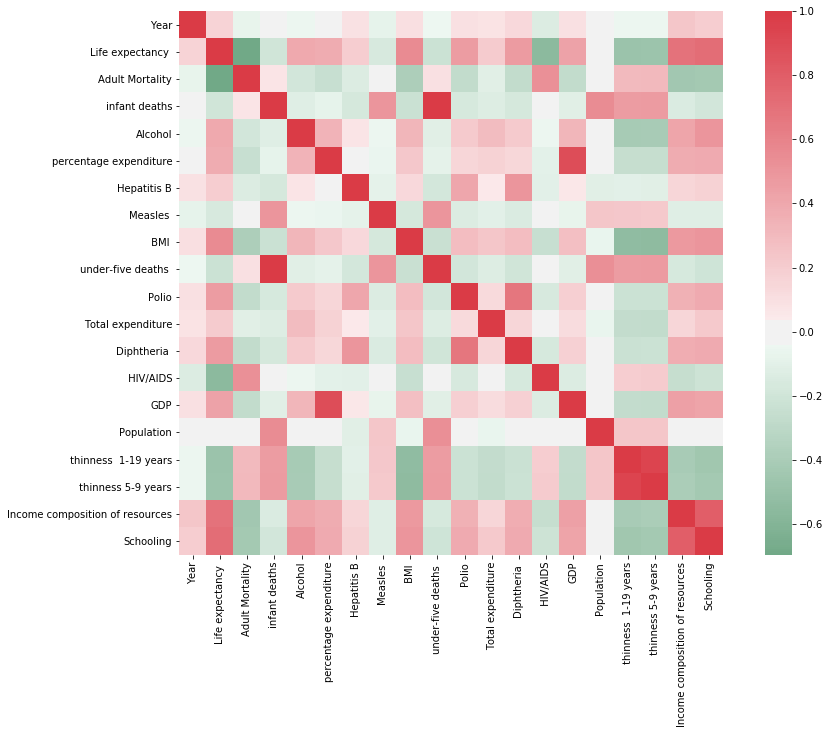

In [28]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(data.corr(), cmap =cmap, center=0, annot=False, square=True);

### Insights from the heatmap
- life expectancy as negative correlation with diseases and positive with schooling
- Those who got vaccinated have high life expectancy

In [29]:
target = data["Life expectancy "]
features = data[data.columns.difference(['Life expectancy '])]


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(pd.get_dummies(features), target, test_size=0.3)

In [31]:
X_train

,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Diphtheria,GDP,Hepatitis B,Income composition of resources,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
28,47.9,0.1,1.9,2.0,18.0,4.290000,97.0,189.681557,97.000000,0.674000,...,0,0,0,0,0,0,0,0,0,1
1796,35.7,2.1,8.2,8.1,248.0,4.602861,92.0,4737.669960,92.000000,0.637000,...,0,0,0,0,0,0,0,0,0,1
2384,21.1,0.9,7.2,7.0,336.0,0.010000,31.0,7483.158469,80.940461,0.627551,...,0,0,0,0,0,0,0,0,0,1
2768,63.1,0.1,0.8,0.5,78.0,10.790000,93.0,7483.158469,80.940461,0.627551,...,0,0,0,0,0,0,0,0,1,0
2728,13.3,10.8,6.9,6.9,539.0,10.570000,55.0,234.984775,80.940461,0.396000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,19.2,13.6,6.9,6.8,487.0,2.080000,8.0,114.587985,8.000000,0.492000,...,0,0,0,0,0,0,1,0,0,1
2608,14.7,0.1,11.7,11.7,168.0,0.060000,79.0,643.719110,79.000000,0.566000,...,0,0,0,0,0,0,0,0,0,1
2175,42.2,0.1,4.3,4.4,149.0,12.090000,96.0,7483.158469,96.000000,0.710000,...,0,0,0,0,0,0,0,0,0,1
2594,55.4,0.1,2.5,2.5,122.0,1.740000,93.0,7483.158469,89.000000,0.703000,...,0,0,0,0,0,0,0,0,0,1


In [32]:
X_test

,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Diphtheria,GDP,Hepatitis B,Income composition of resources,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
856,15.5,1.0,9.0,8.9,311.0,0.63,92.0,43.754450,92.000000,0.402,...,0,0,0,0,0,0,0,0,0,1
1520,53.4,0.1,5.6,5.5,147.0,0.01,94.0,6269.581230,93.000000,0.732,...,0,0,0,0,0,0,0,0,0,1
794,48.6,0.2,1.4,1.3,14.0,3.63,96.0,359.718860,94.000000,0.696,...,0,0,0,0,0,0,0,0,0,1
2429,64.1,0.1,0.6,0.5,63.0,9.62,97.0,31834.218160,97.000000,0.867,...,0,0,0,0,0,0,0,0,1,0
330,5.5,0.1,2.9,2.9,12.0,4.56,93.0,2968.411860,93.000000,0.000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,16.9,3.0,1.1,1.1,336.0,0.17,5.0,315.839830,80.940461,0.322,...,0,0,0,0,0,0,0,0,0,1
1977,47.2,0.8,1.3,1.3,281.0,0.01,79.0,229.953640,73.000000,0.506,...,0,0,0,0,0,0,0,0,0,1
1231,46.2,0.1,7.6,7.7,142.0,0.01,99.0,7483.158469,99.000000,0.674,...,0,0,0,0,0,0,0,0,0,1
2163,14.5,8.1,7.0,7.3,48.0,6.66,96.0,212.661949,96.000000,0.359,...,0,0,0,0,0,0,0,0,0,1


In [33]:
Y_test

856     61.4
1520    71.0
794     74.7
2429    82.1
330     75.0
        ... 
1088    52.5
1977    62.4
1231    71.2
2163    52.0
2120    74.8
Name: Life expectancy , Length: 882, dtype: float64

In [34]:
Y_train

28      72.8
1796    65.8
2384    51.9
2768    81.0
2728    47.7
        ... 
2914    52.6
2608    66.2
2175    74.1
2594    73.7
2788    52.2
Name: Life expectancy , Length: 2056, dtype: float64

In [35]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
Y_pred=model.predict(X_test)
Y_pred

array([61.15664257, 71.09659608, 74.73681101, 83.15716347, 75.29265705,
       72.45092922, 65.76077019, 75.25306183, 72.36210422, 74.51104857,
       67.7278498 , 79.51499016, 55.59398098, 67.17264168, 67.17037291,
       57.77995536, 77.33740906, 55.58171214, 69.56691879, 63.23317304,
       67.85190227, 66.32700052, 80.74213913, 61.36193049, 79.34277899,
       66.00562613, 78.52673602, 76.36131976, 80.71882411, 65.04173445,
       53.82427001, 67.90898504, 64.65801198, 71.30013829, 55.65528315,
       73.97983525, 81.80526024, 62.03526421, 73.03533612, 59.1059832 ,
       80.6007974 , 73.92136422, 69.08590678, 75.62684667, 69.39429133,
       63.8783875 , 82.44853744, 44.08789724, 65.66326884, 59.94296949,
       82.25115191, 75.80437999, 80.71534596, 67.69406119, 66.47340032,
       64.77337128, 75.47003505, 70.9975594 , 75.7188052 , 51.65865878,
       66.00912505, 78.87500693, 66.94747247, 73.1814486 , 75.25755448,
       55.89438761, 73.50786171, 65.5552878 , 81.6159402 , 74.66

In [37]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(Y_test,Y_pred)*100

95.49680332732073